# Task 3: KKBox's Music Recommendation Challenge

# 1- Data Exploration and Preparation

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [3]:
trainSet = pd.read_csv(os.getcwd()+'/train.csv')
testSet = pd.read_csv(os.getcwd()+'/test.csv')
songsSet = pd.read_csv(os.getcwd()+'/songs.csv')
membersSet = pd.read_csv(os.getcwd()+'/members.csv')
sampleSet = pd.read_csv(os.getcwd()+'/sample_submission.csv')


In [4]:
print("--------------- trainSet Info------------------")
print(trainSet.info())
print("\n\n--------------- trainSet Statistics------------------")
print(trainSet.describe())
print("\n\n--------------- trainSet Data-------------------")
print(trainSet.head())


trainSet_categorizedClomuns=['source_system_tab','source_screen_name','source_type']
trainSet[trainSet_categorizedClomuns] = trainSet[trainSet_categorizedClomuns].astype('category')



--------------- trainSet Info------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB
None


--------------- trainSet Statistics------------------
             target
count  7.377418e+06
mean   5.035171e-01
std    4.999877e-01
min    0.000000e+00
25%    0.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    1.000000e+00


--------------- trainSet Data-------------------
                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPK

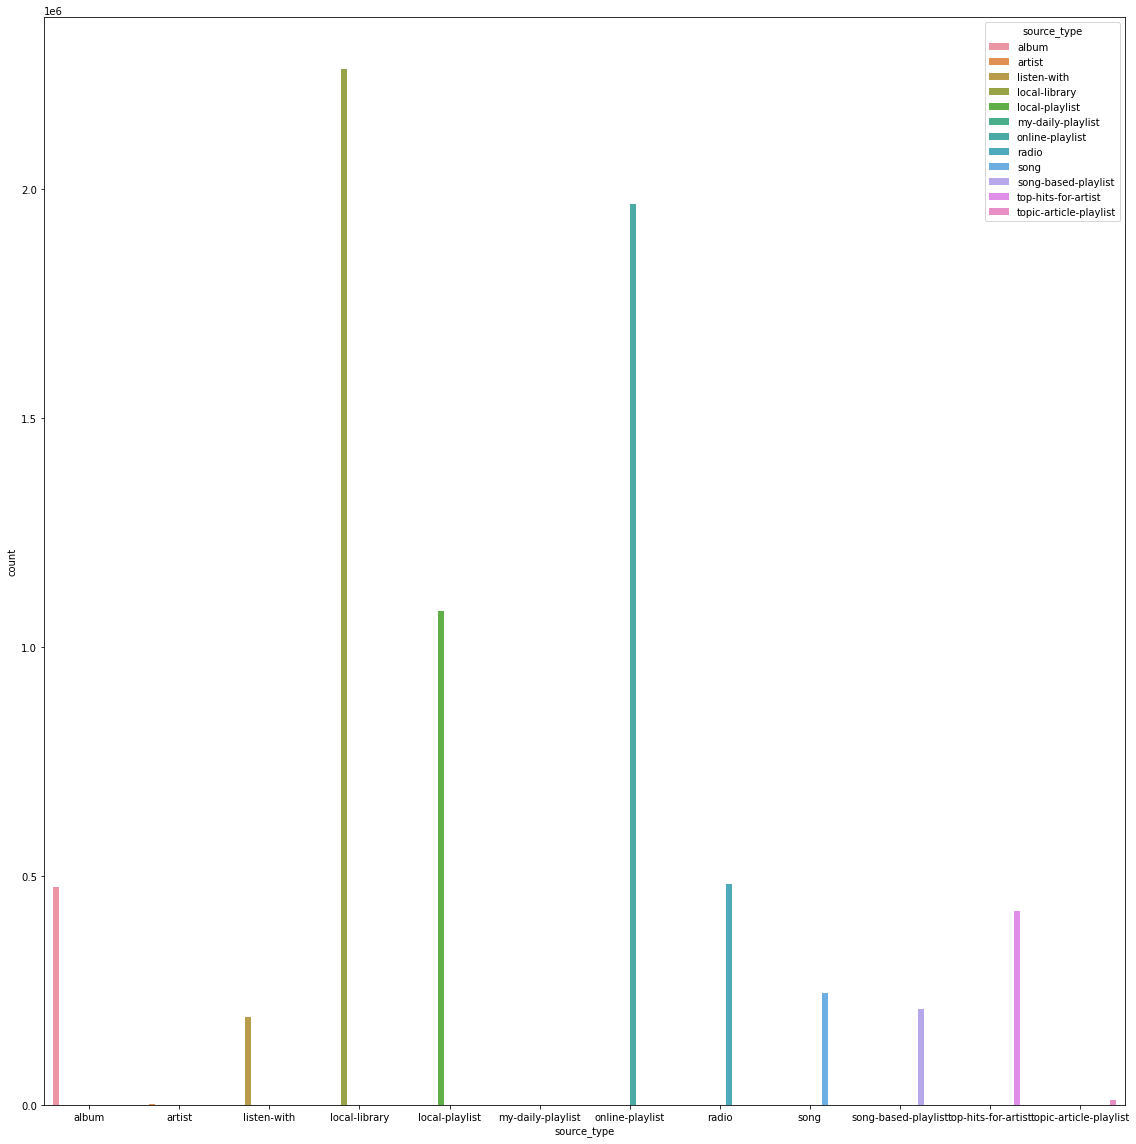

In [5]:
plt.figure(figsize=(16,16))
sns.countplot(x='source_type',hue='source_type',data=trainSet)
plt.tight_layout()

We could exclude that most users use the local library

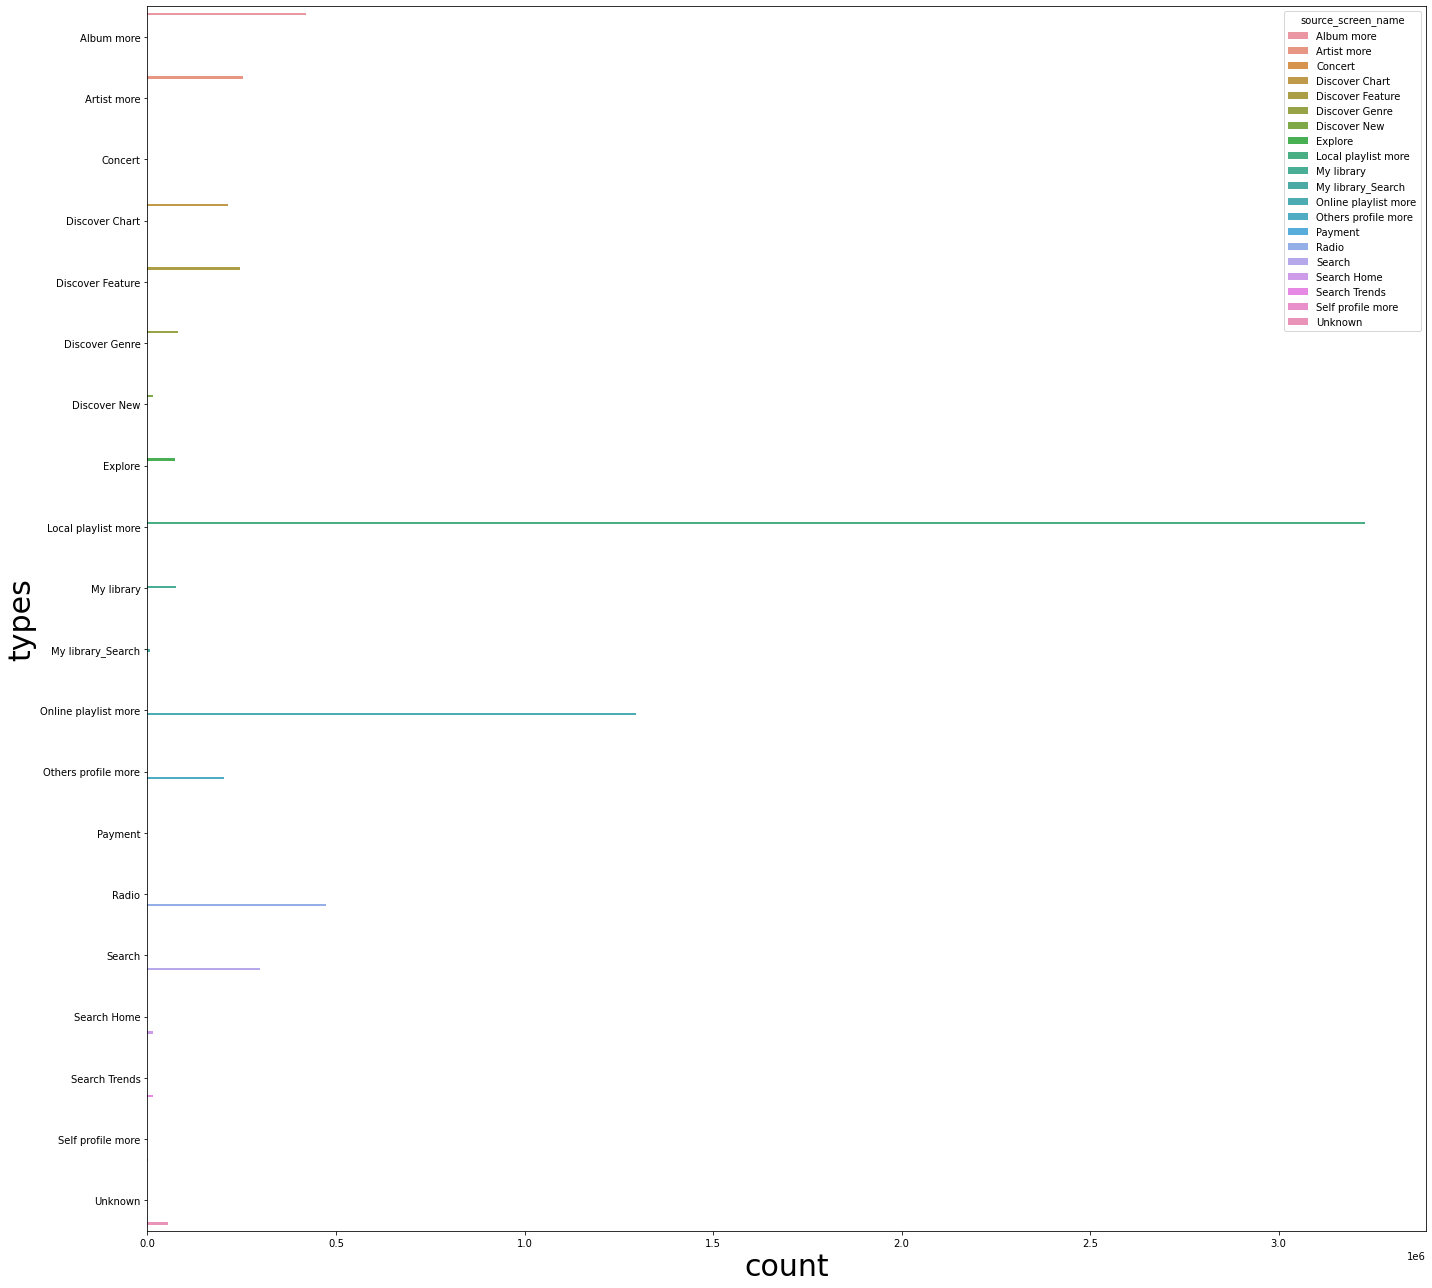

In [6]:
plt.figure(figsize=(20,18))
sns.countplot(y='source_screen_name',hue='source_screen_name',data=trainSet)
plt.xlabel('count',fontsize=30)
plt.ylabel('types',fontsize=30)
plt.tight_layout()


We could exclude that most users use the local playlist more

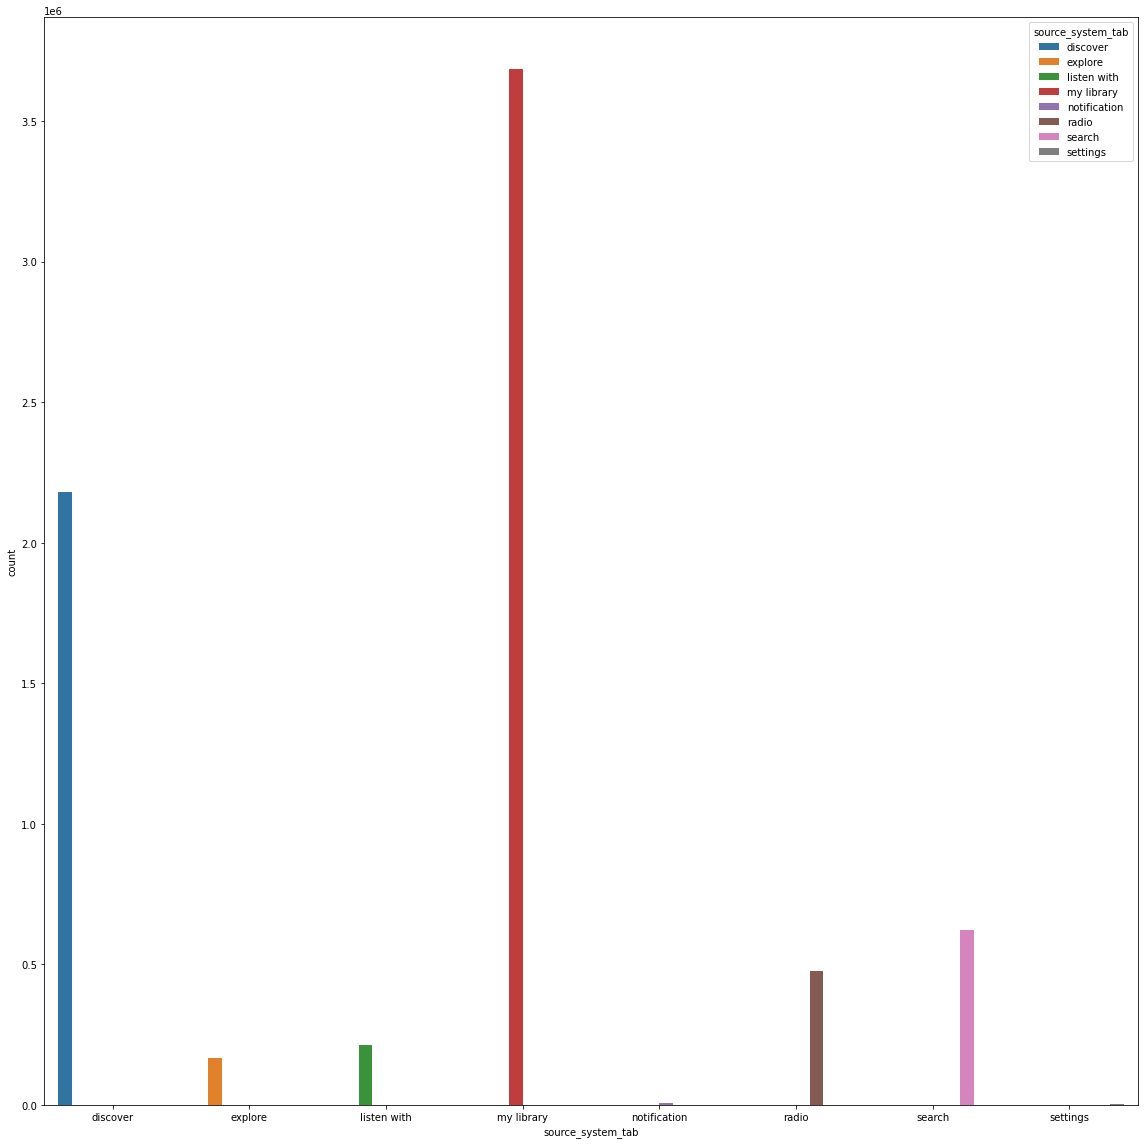

In [7]:
plt.figure(figsize=(16,16))
sns.countplot(x='source_system_tab',hue='source_system_tab',data=trainSet)
plt.tight_layout()


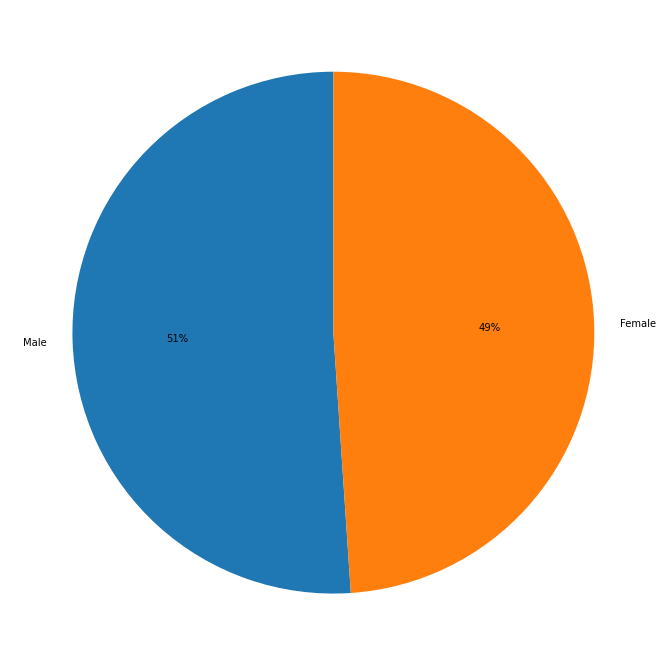

In [8]:
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(membersSet.gender)
plt.pie(sizes, labels=labels,autopct='%.0f%%',startangle=90)
plt.show()


In [9]:
print(testSet.info())
testSet=testSet.drop('id', axis = 1)
print(testSet.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB
None
                                           msno  \
0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          disc

In [10]:
trainSet_categorizedClomuns=['source_system_tab','source_screen_name','source_type']
testSet[trainSet_categorizedClomuns] = testSet[trainSet_categorizedClomuns].astype('category')


In [11]:
print(songsSet.head())
songsSet['language'] = songsSet['language'].astype('category')


                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0  


In [12]:
print(membersSet.info())
print(membersSet.describe())
print(membersSet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
None
               city            bd  registered_via  registration_init_time  \
count  34403.000000  34403.000000    34403.000000            3.440300e+04   
mean       5.371276     12.280935        5.953376            2.013994e+07   
std        6.243929     18.170251        2.287534            2.954015e+04   
min        1.000000    -43.000000        3.000000            

Add more features for members data

In [13]:
membersSet['registration_year'] = membersSet['registration_init_time'].apply(lambda x : int(str(x)[0:4]))
membersSet['registration_month'] = membersSet['registration_init_time'].apply(lambda x : int(str(x)[4:6]))
membersSet['registration_day'] = membersSet['registration_init_time'].apply(lambda x : int(str(x)[6:8]))

membersSet['expiration_year'] = membersSet['expiration_date'].apply(lambda x : int(str(x)[0:4]))
membersSet['expiration_month'] = membersSet['expiration_date'].apply(lambda x : int(str(x)[4:6]))
membersSet['expiration_day'] = membersSet['expiration_date'].apply(lambda x : int(str(x)[6:8]))


membersSet['membership_days'] =  membersSet['expiration_day'] - membersSet['registration_day']


membersSet= membersSet.drop('registration_init_time' ,axis =1)
membersSet= membersSet.drop('expiration_date' ,axis =1)









In [14]:
membersSet.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via', 'registration_year',
       'registration_month', 'registration_day', 'expiration_year',
       'expiration_month', 'expiration_day', 'membership_days'],
      dtype='object')

C:\Users\RC\.conda\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'registration time ')

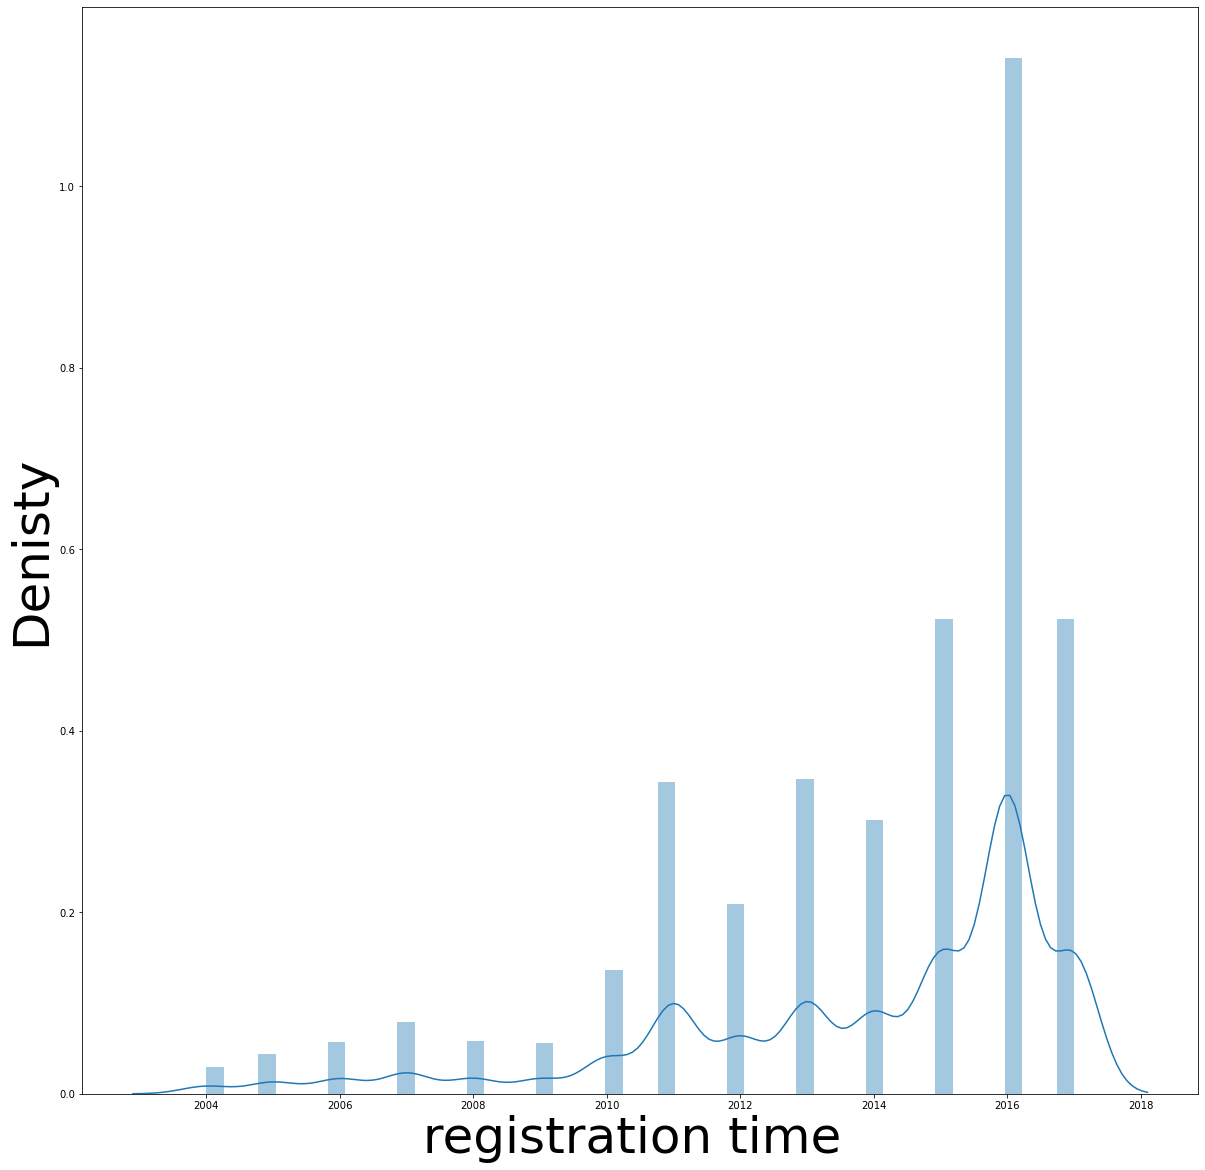

In [15]:
plt.figure(figsize = (20, 20)) 
sns.distplot(membersSet.registration_year)
plt.ylabel('Denisty',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)


C:\Users\RC\.conda\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'expiration time ')

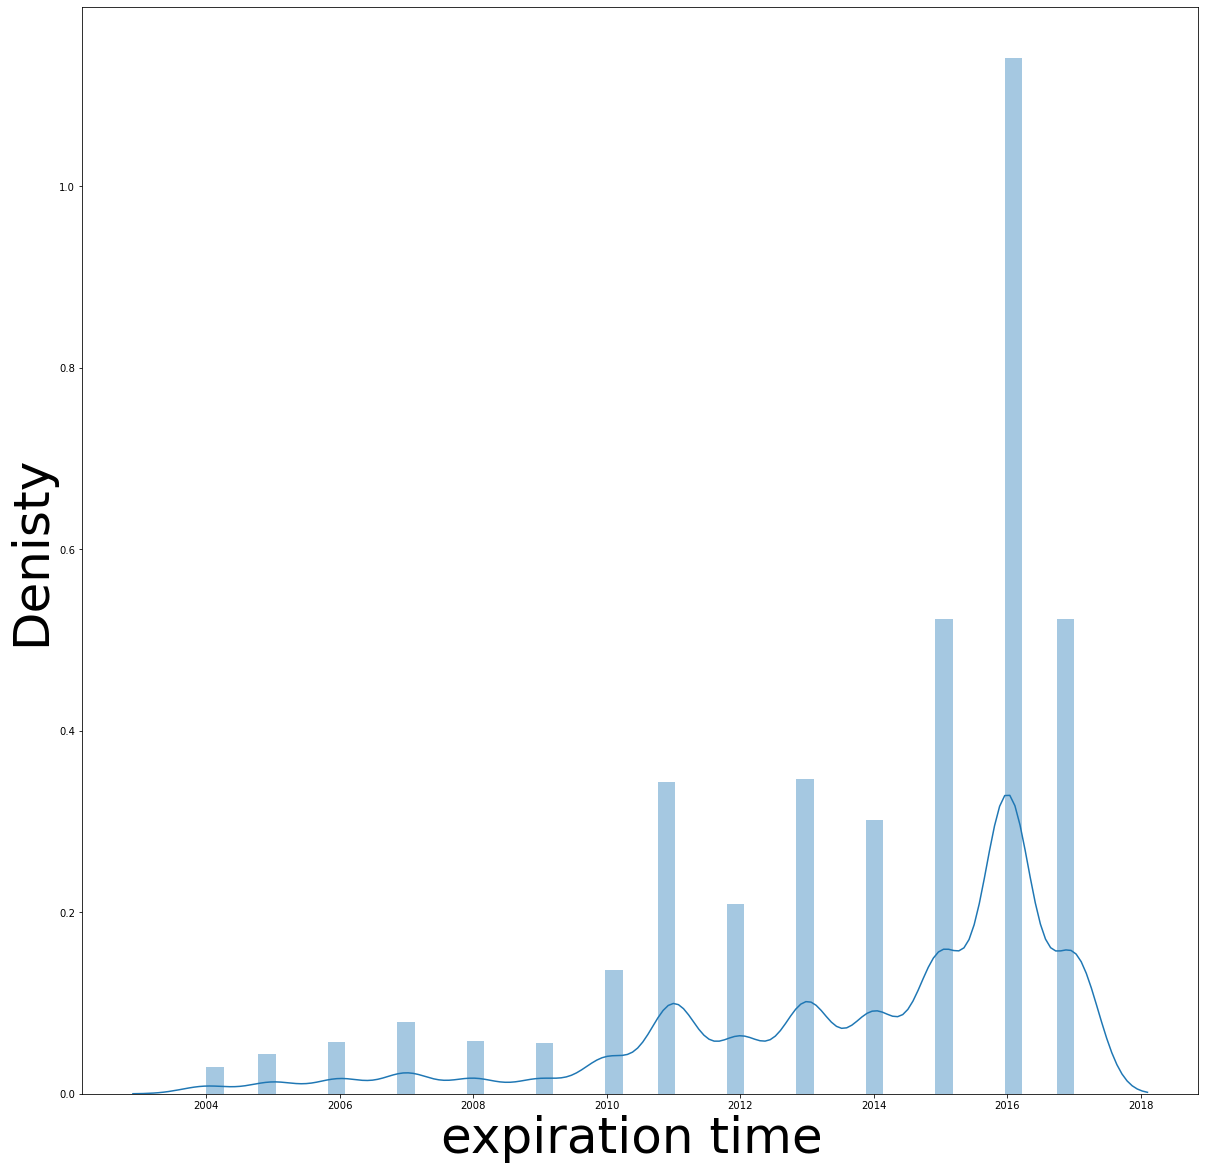

In [16]:
plt.figure(figsize = (20, 20)) 
sns.distplot(membersSet.registration_year)
plt.ylabel('Denisty',fontsize=50)
plt.xlabel('expiration time ' ,fontsize=50)


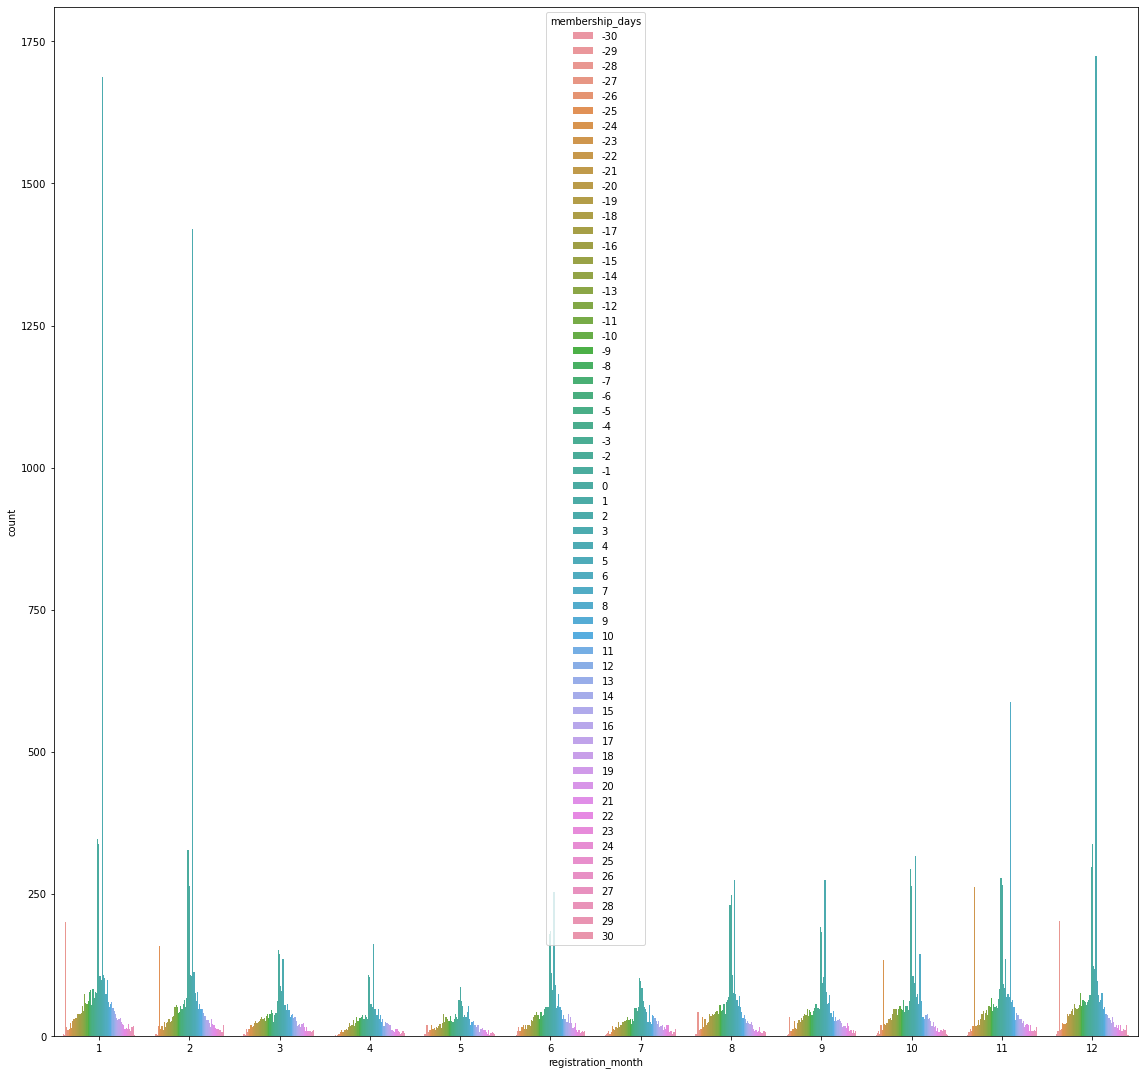

In [17]:
plt.figure(figsize=(16,16))
sns.countplot(x='registration_month',hue='membership_days',data=membersSet)
plt.tight_layout()

In [18]:
songsExtraSet= pd.read_csv(os.getcwd()+'/song_extra_info.csv')

In [19]:
print(songsExtraSet.head())
def To_year(x):
    if type(x) == str:
        if int(x[5:7]) > 17:
            return 1900 + int(x[5:7])
        else:
            return 2000 + int(x[5:7])
    else:
        return np.nan
    
songsExtraSet['song_year']= songsExtraSet['isrc'].apply(To_year)

                                        song_id             name          isrc
0  LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=               我們  TWUM71200043
1  ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=  Let Me Love You  QMZSY1600015
2  u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=              原諒我  TWA530887303
3  92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=          Classic  USSM11301446
4  0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=             愛投羅網  TWA471306001


In [20]:
songsExtraSet.drop('name',axis=1)
songsExtraSet.drop('isrc',axis=1)
print(songsSet.head())
songsSet = pd.merge(songsSet,songsExtraSet,on= "song_id" , how = "inner")
print(songsSet.head())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘      3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY     31.0  
2      SUPER JUNIOR                                 NaN          NaN     31.0  
3             S.H.E                                 湯小康          徐世珍      3.0  
4              貴族精選                         Traditional  Traditional     52.0  
                                        song_id  song_length genre_ids  \
0

In [77]:
Language_count = songsSet['language'].value_counts()
artist_count = songsSet['artist_name'].value_counts()

# add more features for songs


    
songsSet['language_attractive'] =songsSet['language'].apply(lambda x : Language_count[x])

songsSet['artist_attractive'] =songsSet['artist_name'].apply(lambda x : artist_count[x])

print(songsSet)

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2295417  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2295418  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2295419  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2295420  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2295421  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

In [81]:
if False:
    def Numeric_cols(df):
        return df.select_dtypes(include=np.number).columns.tolist()
    def getColsWNan(df):
        cols_with_missing = [col for col in df.columns
                         if df[col].isnull().any()]
        return cols_with_missing


    from sklearn.impute import SimpleImputer

    my_imputer = SimpleImputer()
    imputed_train = pd.DataFrame(my_imputer.fit_transform(Train_Members_Songs[cols_test]))
    imputed_test = pd.DataFrame(my_imputer.fit_transform(Test_Members_Songs[cols_test]))

    imputed_train.columns = cols_train
    imputed_test.columns = cols_test
    Train_Members_Songs[cols_train] = imputed_train.columns
    Test_Members_Songs[cols_test] = imputed_test.columns


In [82]:
trainSet = trainSet .merge(membersSet , on='msno', how='left')
testSet = testSet .merge(membersSet , on='msno', how='left')

trainSet = trainSet.merge(songsSet, on = 'song_id', how = 'left')
testSet = testSet.merge(songsSet, on = 'song_id', how = 'left')




In [ ]:

X_train = trainSet.drop(['target'], axis=1)
y_train = trainSet['target'] 


In [98]:
for col in X_train.columns:
    if X_train[col].dtype == object:
        X_train[col] = X_train[col].astype('category')
        testSet[col] = testSet[col].astype('category')

In [99]:
import lightgbm as lgb

d_train_final = lgb.Dataset(X_train, y_train)
watchlist_final = lgb.Dataset(X_train, y_train)

params = {}
params['learning_rate'] = 0.2
params['application'] = 'binary'
params['max_depth'] = 10
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model = lgb.train(params, train_set=d_train_final, num_boost_round=50, valid_sets=watchlist_final,  verbose_eval=5)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.442970 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\RC\.conda\envs\ML\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\RC\.conda\envs\ML\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[5]	valid_0's auc: 0.713359
[10]	valid_0's auc: 0.730873
[15]	valid_0's auc: 0.739771
[20]	valid_0's auc: 0.746208
[25]	valid_0's auc: 0.750112
[30]	valid_0's auc: 0.753395
[35]	valid_0's auc: 0.755719
[40]	valid_0's auc: 0.758753
[45]	valid_0's auc: 0.761035
[50]	valid_0's auc: 0.763175


In [101]:

p_test = model.predict(testSet)


In [103]:
subm = pd.DataFrame()
subm['target'] = p_test
subm.to_csv(os.getcwd()+'/submission.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
print('Done!')

Done!
